# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [25]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [26]:
def f(x):
    y=numpy.sin(x)
    z=x**2
    return z*y

Ensure your function works with numpy arrays:

In [27]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [28]:
def g(x):
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [29]:
assert g(0) == 0.

In [30]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [31]:
def integrate_analytic(xmin, xmax):
    y= 2*xmin*numpy.sin(xmin)-(xmin**2-2)*numpy.cos(xmin)
    z=2*xmax*numpy.sin(xmax)-(xmax**2-2)*numpy.cos(xmax)
    return z-y

Check your analytic function:

In [32]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [33]:
def integrate_numeric(xmin, xmax, N):
    dx=(xmax-xmin)/N #interval
    m1 = xmin + dx/2
    k=0
    m=0
   
    for i in range(1,N):
        k += 2*f(xmin+i*dx)
        
      
    for i in range(0,N):
        m += 4*f(m1 + i*dx)
        
    l=(dx/6)*(m+k+f(xmin)+f(xmax))
              
    print("intergral=",l)
    return l
    
    

Make sure you have implemented Simpson's rule correctly:

In [34]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

intergral= 1.6266126028560373


In [35]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

intergral= 1.0965909955991098


+## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


intergral= 2.4690909838319284
intergral= 2.469459200257431
intergral= 2.4694818744619678
intergral= 2.469483286359016
intergral= 2.469483374520932
intergral= 2.469483380029777
intergral= 2.4694833803740606
intergral= 2.469483380395576
intergral= 2.4694833803969223


Text(0.5,1,"Comparing the Fractional error between the Analytic and Numeric intergrals against number of panels, using Simpson's rule")

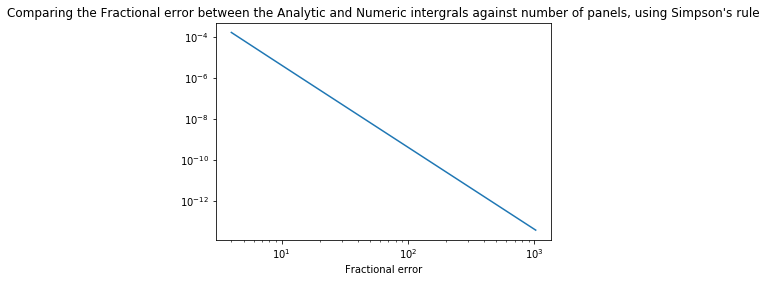

In [43]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024] 
    
result_analytic = integrate_analytic(x0, x1) 
list1= []

for i in (panel_counts):
    d = ((result_analytic -integrate_numeric(x0, x1, i))/result_analytic)
    list1.append(d)



plt.loglog(panel_counts, list1)
plt.xlabel("Number of Panels")
plt.xlabel("Fractional error")
plt.title("Comparing the Fractional error between the Analytic and Numeric intergrals against number of panels, using Simpson's rule")



What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels(N) reduces the error and therefore increases the accuracy of the numerical method up to a point. This reduction of error with increase of panels is directly proportional in loglog plot. Increasing N to too large a value can result in the error not continuing to reduce with N's increase, but on a loglog plot fluctuating and even increasing slightly. This means the accuracy then starts to reduce slightly for N very large

If the trapezium rule was being used, how would the panel
count affect accuracy? 

In general, like Simpson's rule, the higher the panel count, the smaller the error and the higher the accuracy. However the rate at which the error descreases (and therefore accuracy increases), with N, on a loglog plot, does start to decrease for very high values of N. The error itself can even start to increase(and therefore accuracy decrease) if the function being intergrated is not smooth.